# Astropy
<img src="images/astropy_banner.svg" alt="astropy" style="width: 600px;"/>

<a href="https://colab.research.google.com/github/ryan-leung/PHYS4650_Python_Tutorial/blob/master/notebooks/07-Python-Astropy-Aplpy.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory">
</a>

# Units calculation

You may also refer to the following tutorial by AstoPy team
http://www.astropy.org/astropy-tutorials/Quantities.html

In [1]:
from astropy import units as u
from astropy import constants as const

In [2]:
const.c

<<class 'astropy.constants.codata2014.CODATA2014'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2014'>

In [3]:
const.m_e

<<class 'astropy.constants.codata2014.CODATA2014'> name='Electron mass' value=9.10938356e-31 uncertainty=1.1e-38 unit='kg' reference='CODATA 2014'>

In [4]:
const.m_e.cgs

<Quantity 9.10938356e-28 g>

In [5]:
10*u.g*const.c.cgs**2

<Quantity 8.98755179e+21 cm2 g / s2>

In [6]:
u.erg

Unit("erg")

In [7]:
u.erg.decompose()

Unit("1e-07 kg m2 / s2")

## Load fits file

In [8]:
from astropy.io import fits
from astropy.utils.data import download_file

In [9]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

We can open the fits file by fits.open() and check the info of the fits file by .info()

In [10]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/yanyan/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


We get the data by `.data`

In [11]:
image_data = hdu_list[0].data
image_data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

We get the header by `.header` 

In [12]:
image_header = hdu_list[0].header
image_header.items

<bound method Header.items of SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                              

Image header is similar to a dictionary, we can get individual header items by putting correspoding field:

In [13]:
image_header['CRVAL1'], image_header['CRVAL2']

(85.27497, -2.458265)

## Check the image in fits file

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

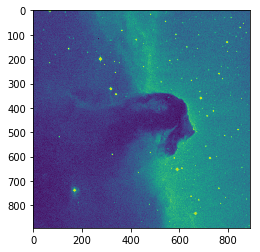

In [15]:
plt.imshow(image_data)

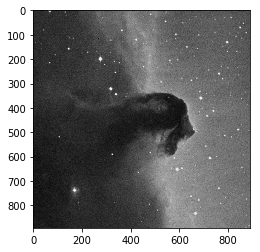

In [16]:
plt.imshow(image_data,cmap='gray')

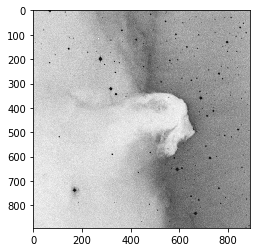

In [17]:
plt.imshow(image_data,cmap='gray_r')

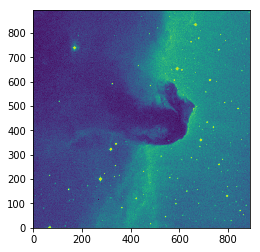

In [18]:
# Noted the image is upside down
import numpy as np
plt.imshow(image_data,origin="lower")

# AplPy

In [20]:
import aplpy

/home/yanyan/anaconda3/lib/python3.7/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


INFO: Auto-setting vmin to  3.634e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.940e+04 [aplpy.core]


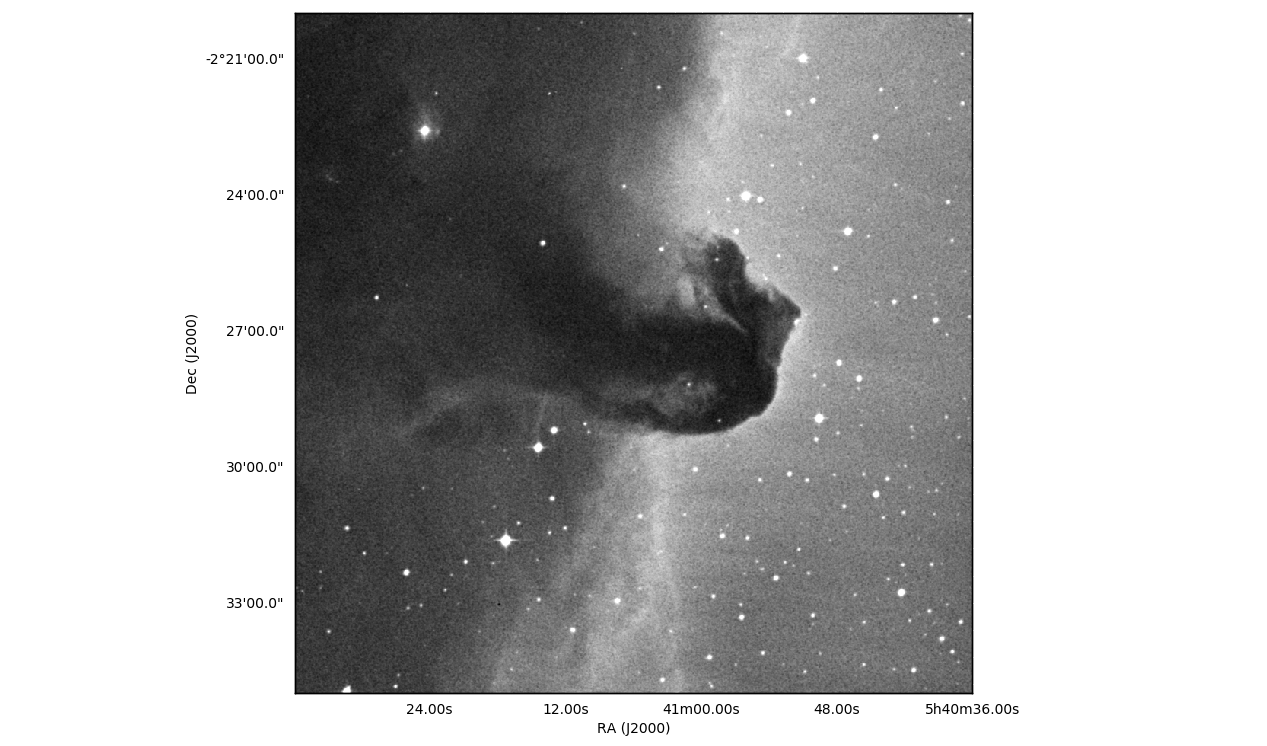

In [21]:
f = aplpy.FITSFigure(image_file,figsize=(16,9), dpi=100)
f.show_colorscale(cmap='gray')

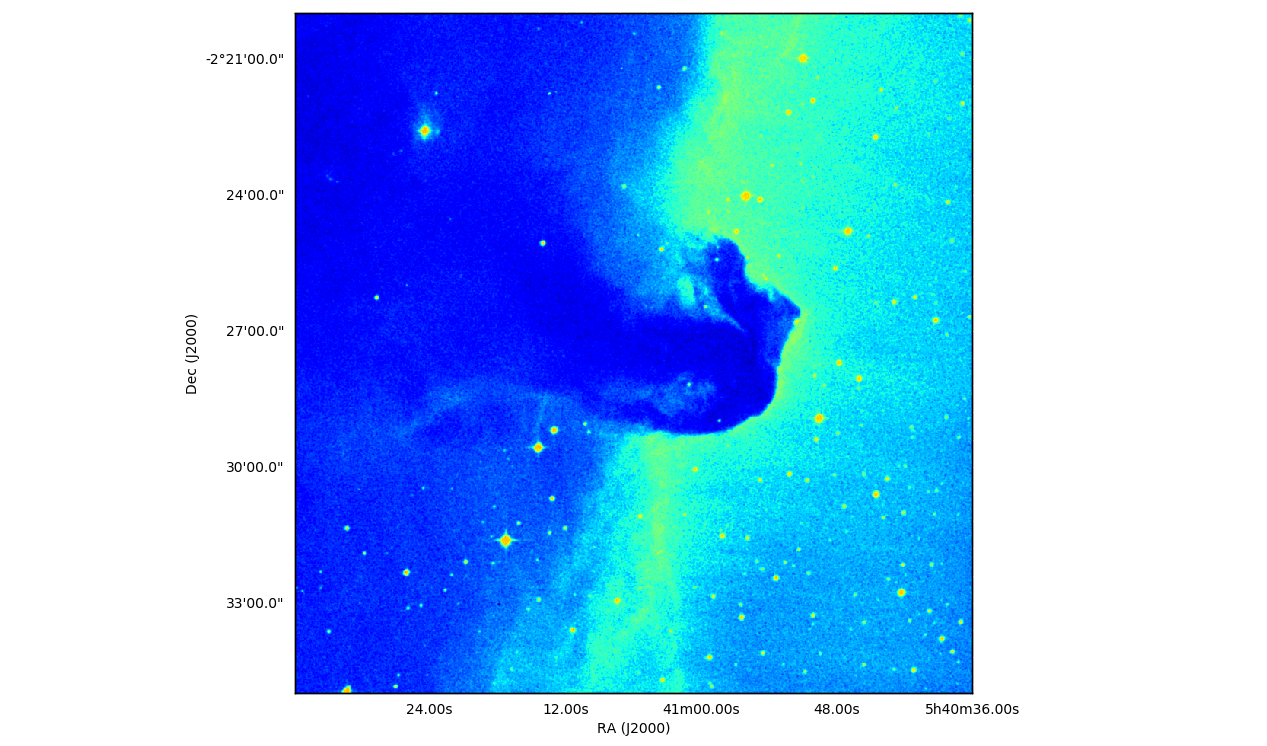

In [22]:
# vim and vmax set the range of values to be shown
f = aplpy.FITSFigure(image_file,figsize=(16,9), dpi=100)
f.show_colorscale(cmap='jet', vmin=3e3, vmax=3e4)

INFO: Auto-setting vmin to  3.634e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.940e+04 [aplpy.core]


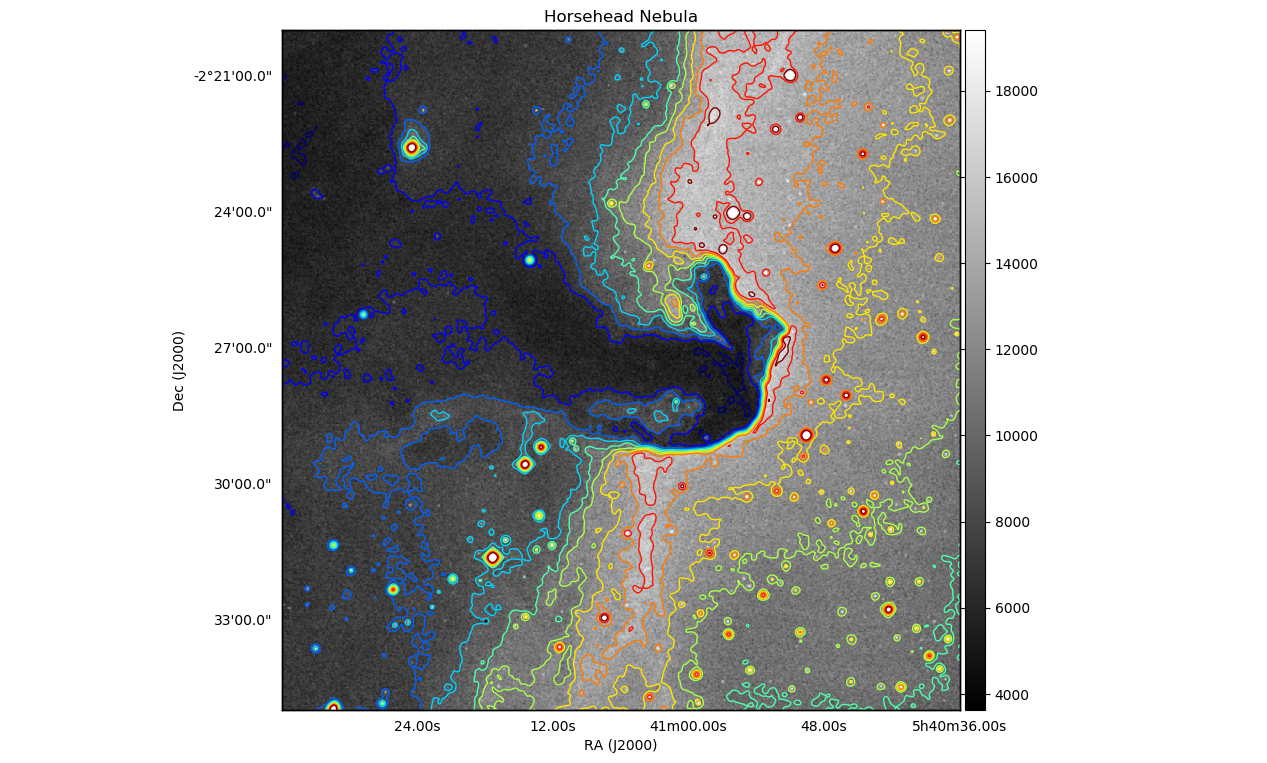

In [23]:
f = aplpy.FITSFigure(image_file,figsize=(16,9), dpi=100)
# Background image
f.show_colorscale(cmap='gray')
# Contour
f.show_contour(image_file,levels=10,cmap='jet',smooth=3,linewidths=1.0)
# Title and colourbar
f.set_title('Horsehead Nebula')
f.add_colorbar()